# Prediction of Hotels Booking Cancellation 

## Importing necessary libraries and data

In [1]:
# To filter the warnings
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# To tune different models
from sklearn.model_selection import GridSearchCV

# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,    
)

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Section 1
## 1.1 Data Overview

- Observations
- Sanity checks

In [2]:
df = pd.read_csv("../data/raw/booking_original.csv")

In [3]:
df.head(n=5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
df.sample(n=6, random_state=1)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
30392,INN30393,1,0,1,0,Not Selected,0,Room_Type 1,53,2018,9,11,Online,0,0,0,94.32,0,Not_Canceled
6685,INN06686,2,0,1,2,Meal Plan 1,0,Room_Type 1,63,2018,4,22,Online,0,0,0,105.30,1,Canceled
8369,INN08370,2,0,2,3,Meal Plan 1,0,Room_Type 4,55,2018,9,11,Online,0,0,0,106.24,0,Not_Canceled
2055,INN02056,2,0,0,2,Not Selected,0,Room_Type 1,53,2017,12,29,Online,0,0,0,81.00,1,Not_Canceled
10969,INN10970,1,0,2,4,Meal Plan 1,0,Room_Type 1,245,2018,7,6,Offline,0,0,0,110.00,0,Canceled
24881,INN24882,2,0,3,7,Meal Plan 1,0,Room_Type 2,231,2018,8,1,Online,0,0,0,81.82,2,Canceled


In [5]:
df.shape

(36275, 19)

**Let's see duplicate data**

In [6]:
df[df.duplicated()].count()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

* There is no duplicate data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [8]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Booking_ID,36275,36275,INN00001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_adults,36275.0,NaN,NaN,NaN,1.844962,0.518715,0.0,2.0,2.0,2.0,4.0
no_of_children,36275.0,NaN,NaN,NaN,0.105279,0.402648,0.0,0.0,0.0,0.0,10.0
no_of_weekend_nights,36275.0,NaN,NaN,NaN,0.810724,0.870644,0.0,0.0,1.0,2.0,7.0
no_of_week_nights,36275.0,NaN,NaN,NaN,2.2043,1.410905,0.0,1.0,2.0,3.0,17.0
type_of_meal_plan,36275,4,Meal Plan 1,27835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_car_parking_space,36275.0,NaN,NaN,NaN,0.030986,0.173281,0.0,0.0,0.0,0.0,1.0
room_type_reserved,36275,7,Room_Type 1,28130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,36275.0,NaN,NaN,NaN,85.232557,85.930817,0.0,17.0,57.0,126.0,443.0
arrival_year,36275.0,NaN,NaN,NaN,2017.820427,0.383836,2017.0,2018.0,2018.0,2018.0,2018.0


## 1.2 Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

We gonna change the variables: required_car_parking_space, repeated_guest into categorical variables

In [9]:
df['required_car_parking_space'] = df['required_car_parking_space'].astype("object") 
df['repeated_guest'] = df['repeated_guest'].astype("object")

We gonna replace the binary data by strings 'Yes' or 'No'

In [10]:
index_aux=df[df['required_car_parking_space']==1].index.tolist()
df.loc[index_aux,'required_car_parking_space']='Yes'
index_aux=df[df['required_car_parking_space']==0].index.tolist()
df.loc[index_aux,'required_car_parking_space']='No'

index_aux=df[df['repeated_guest']==1].index.tolist()
df.loc[index_aux,'repeated_guest']='Yes'
index_aux=df[df['repeated_guest']==0].index.tolist()
df.loc[index_aux,'repeated_guest']='No'

In [11]:
df["booking_status"] = df["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)

In [12]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Booking_ID,36275,36275,INN00001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_adults,36275.0,NaN,NaN,NaN,1.844962,0.518715,0.0,2.0,2.0,2.0,4.0
no_of_children,36275.0,NaN,NaN,NaN,0.105279,0.402648,0.0,0.0,0.0,0.0,10.0
no_of_weekend_nights,36275.0,NaN,NaN,NaN,0.810724,0.870644,0.0,0.0,1.0,2.0,7.0
no_of_week_nights,36275.0,NaN,NaN,NaN,2.2043,1.410905,0.0,1.0,2.0,3.0,17.0
type_of_meal_plan,36275,4,Meal Plan 1,27835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_car_parking_space,36275,2,No,35151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
room_type_reserved,36275,7,Room_Type 1,28130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,36275.0,NaN,NaN,NaN,85.232557,85.930817,0.0,17.0,57.0,126.0,443.0
arrival_year,36275.0,NaN,NaN,NaN,2017.820427,0.383836,2017.0,2018.0,2018.0,2018.0,2018.0


The min year is **2017** and max year is **2018** in the data.

The min month is 1 being that January, and max month is 12 being that December.

In [13]:
## To plot quantitive variables
def plot_num(feature):
    fig,axes=plt.subplots(1,2)
    sns.boxplot(data=df,x=feature,ax=axes[0])
    sns.distplot(a=df[feature],ax=axes[1],color='#ff4125')
    fig.set_size_inches(15,5)

## 1.3 EDA

- It is a good idea to explore the data once again after manipulating it.

**1. What are the busiest months in the hotel?**

We need to convert them into categorical variables

In [14]:
df['arrival_year'] = df['arrival_year'].astype("object")
df['arrival_month'] = df['arrival_month'].astype("object")

In [15]:
years=['2017','2018']
months=['January','February','March','April','May','June','July','August','September','October','November','December']

y_num=2017
for y_text in years:
    index_aux=df[df['arrival_year']==y_num].index.tolist()
    df.loc[index_aux,'arrival_year']=y_text
    y_num=y_num+1
    
m_num=1
for m_text in months:
    index_aux=df[df['arrival_month']==m_num].index.tolist()
    df.loc[index_aux,'arrival_month']=m_text
    m_num=m_num+1    

In [16]:
df[['arrival_year','arrival_month']].describe()

,arrival_year,arrival_month
count,36275,36275
unique,2,12
top,2018,October
freq,29761,5317


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  object 
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  object 
 10  arrival_month                         36275 non-null  object 
 11  arrival_date   

**Number of adults**

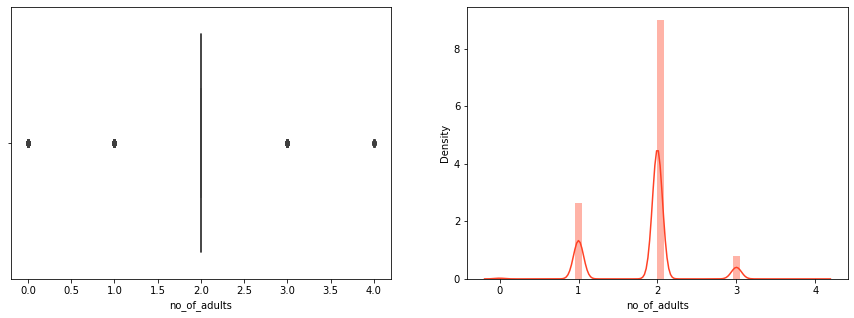

In [56]:
plot_num('no_of_adults')

In [57]:
df['no_of_adults'].value_counts()

2    26108
1     7695
3     2317
0      139
4       16
Name: no_of_adults, dtype: int64

**Number of children**

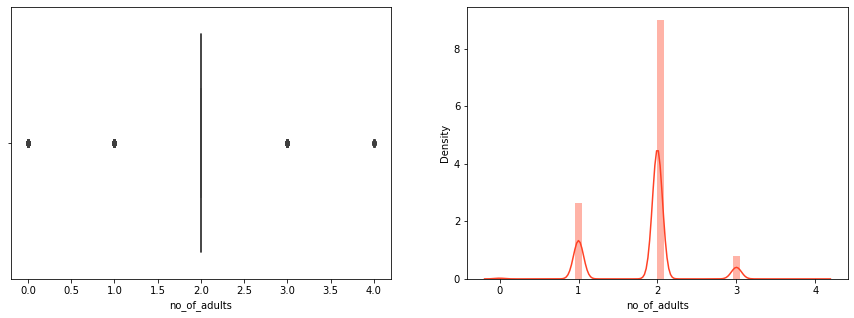

In [58]:
plot_num('no_of_adults')

In [59]:
df['no_of_children'].value_counts()

0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64

**Number of weekend nights**

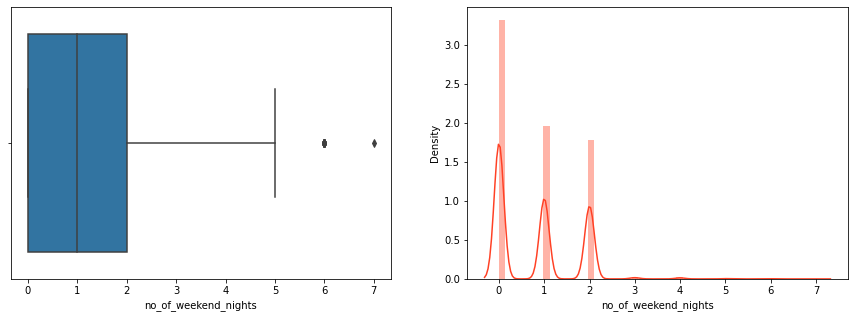

In [60]:
plot_num('no_of_weekend_nights')

**Number of week nights**

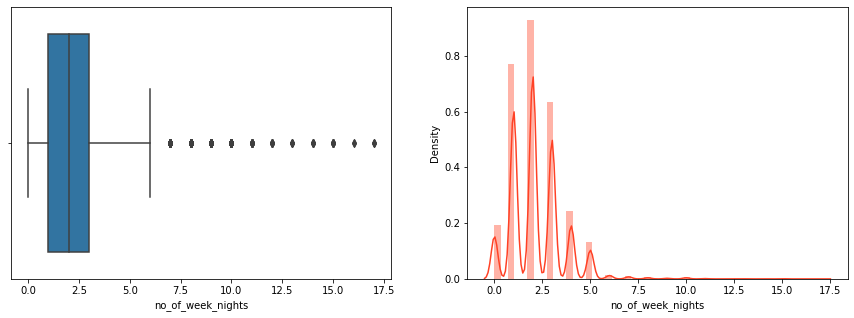

In [61]:
plot_num('no_of_week_nights')

* This is a right skewed distribution, so we can get its logarithm for a better distribution

In [18]:
df["no_of_week_nights_log"] = np.log(df["no_of_week_nights"]+1)

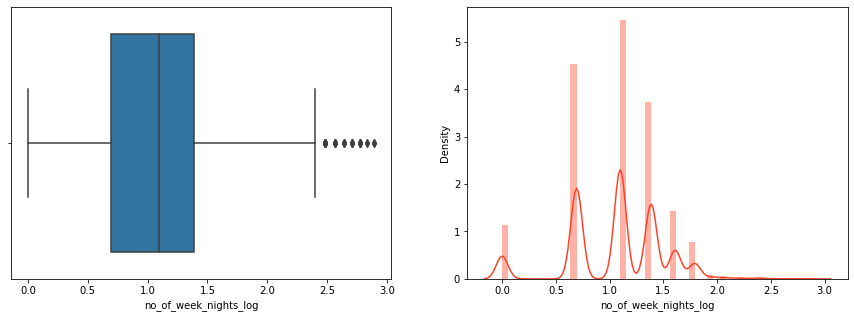

In [63]:
plot_num('no_of_week_nights_log')

**Arrival date (day)**

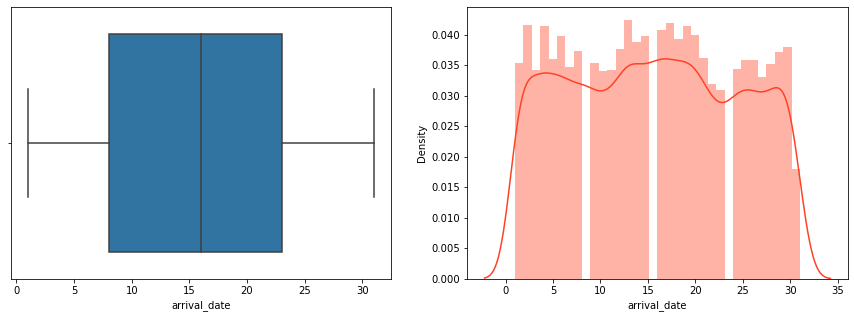

In [64]:
plot_num('arrival_date')

**Lead time**

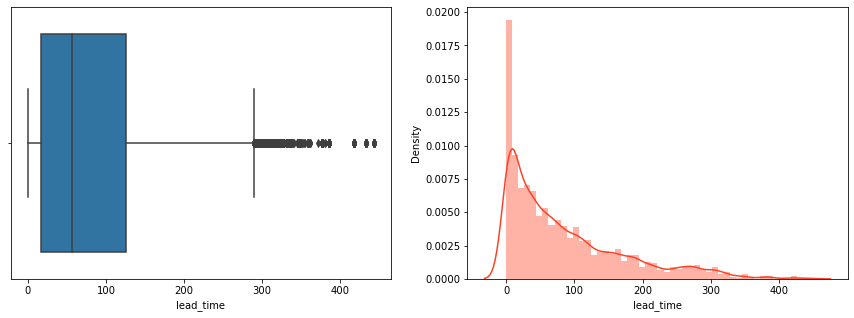

In [65]:
plot_num('lead_time')

* This is a very right skewed distribution, so we can get the logarithm for a better distribution

In [19]:
df["lead_time_log"] = np.log(df["lead_time"]+1)

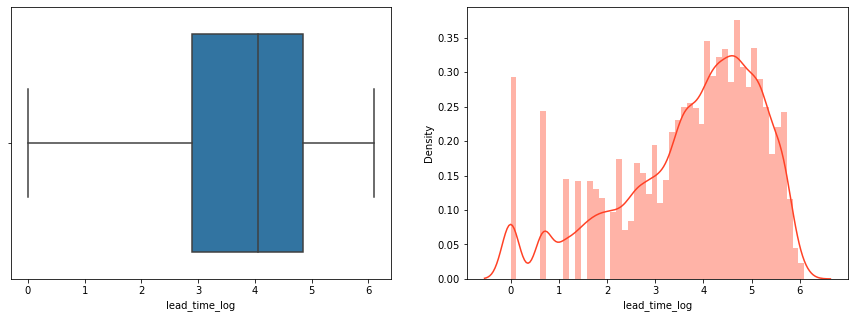

In [67]:
plot_num('lead_time_log')

**Number of previous cancellation**

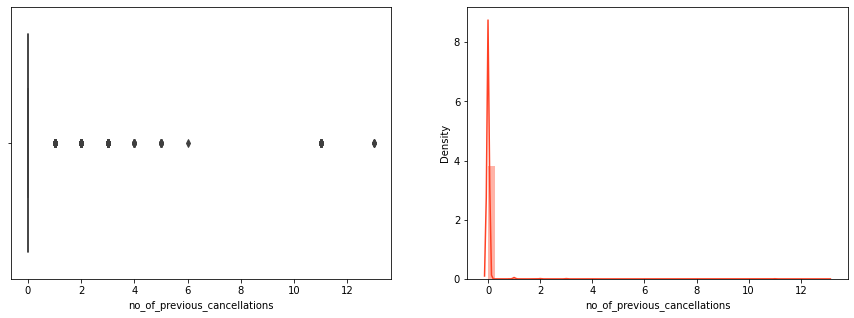

In [68]:
plot_num('no_of_previous_cancellations')

* Let's see a wider insight about what happen with another number of cancellations since 1. 

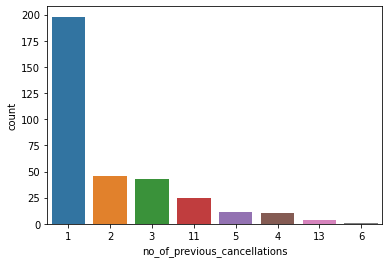

In [122]:
sns.countplot(data=df,x='no_of_previous_cancellations',order=df['no_of_previous_cancellations'].value_counts()[1:9].index);

**Number of previous bookings not cancelled**

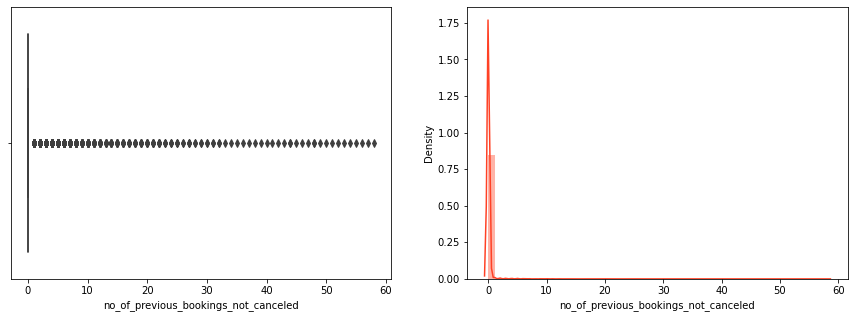

In [123]:
plot_num('no_of_previous_bookings_not_canceled')

In [124]:
df['no_of_previous_bookings_not_canceled'].value_counts()[0:20]

0     35463
1       228
2       112
3        80
4        65
5        60
6        36
7        24
8        23
10       19
9        19
11       15
12       12
14        9
15        8
16        7
13        7
18        6
20        6
21        6
Name: no_of_previous_bookings_not_canceled, dtype: int64

**Average price per room**

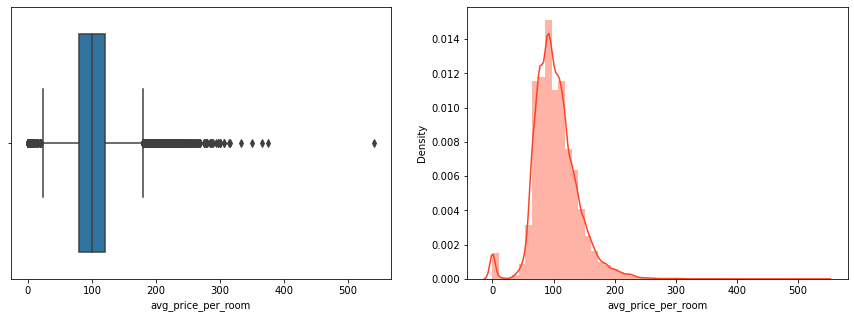

In [72]:
plot_num('avg_price_per_room')

**Number of special requests**

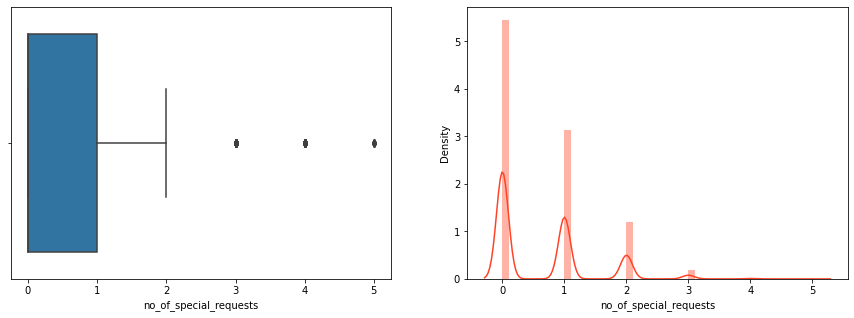

In [73]:
plot_num('no_of_special_requests')

In [125]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
no_of_week_nights_log                   0
dtype: int64

### Outlier Check

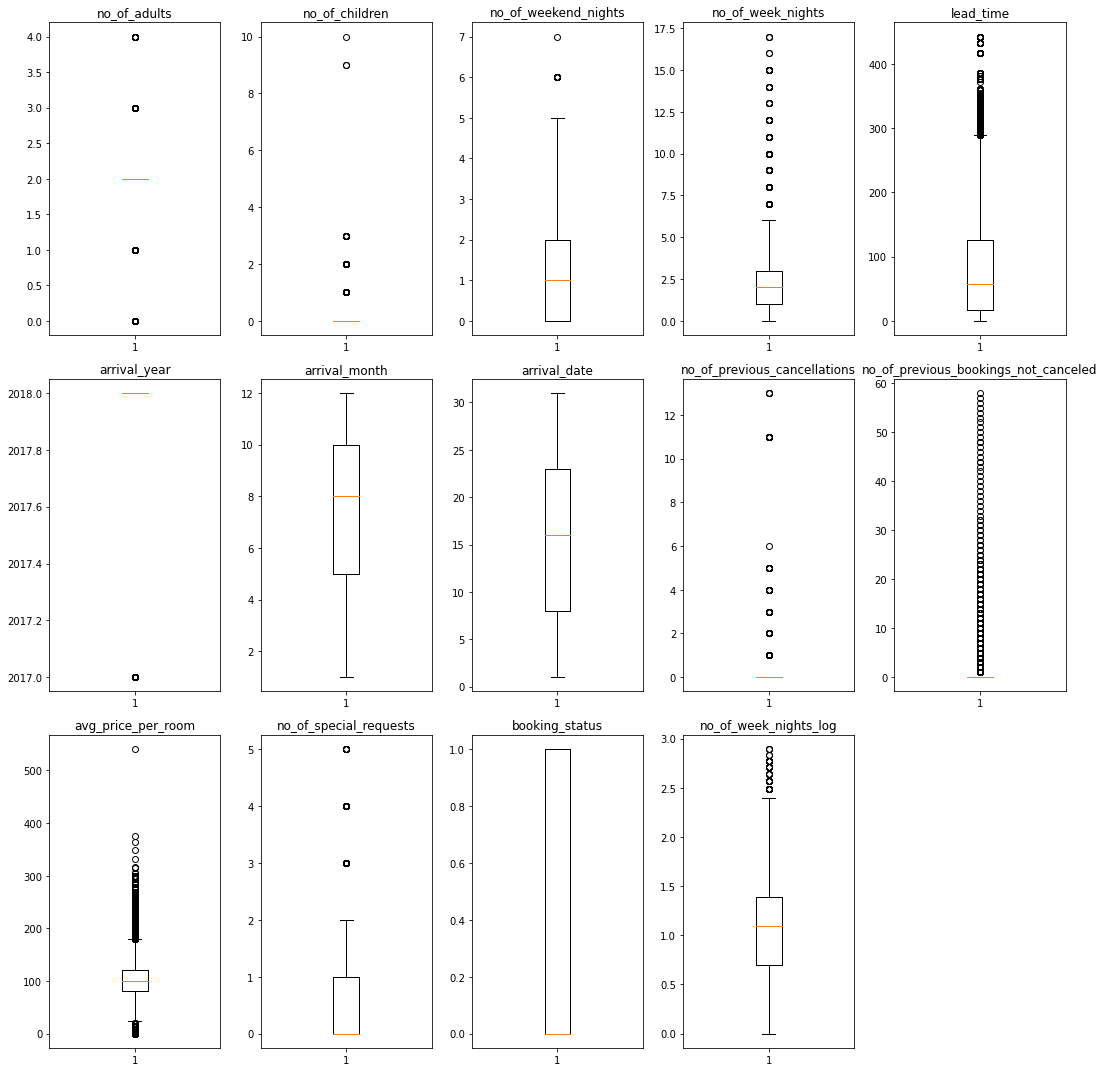

In [126]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 5, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [20]:
# functions to treat outliers by flooring and capping
def treat_outliers(df, col):
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Low_Whisker = Q1 - 1.5 * IQR
    Upp_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Low_Whisker, Upp_Whisker)


def treat_outliers_all(df, col_list):
    for c in col_list:
        df = treat_outliers(df, c)

    return df

### Here we remove and replace the outliers by whiskers, mainly in these columns

In [21]:
treat_outliers(df,'lead_time')

In [22]:
treat_outliers(df,'avg_price_per_room')

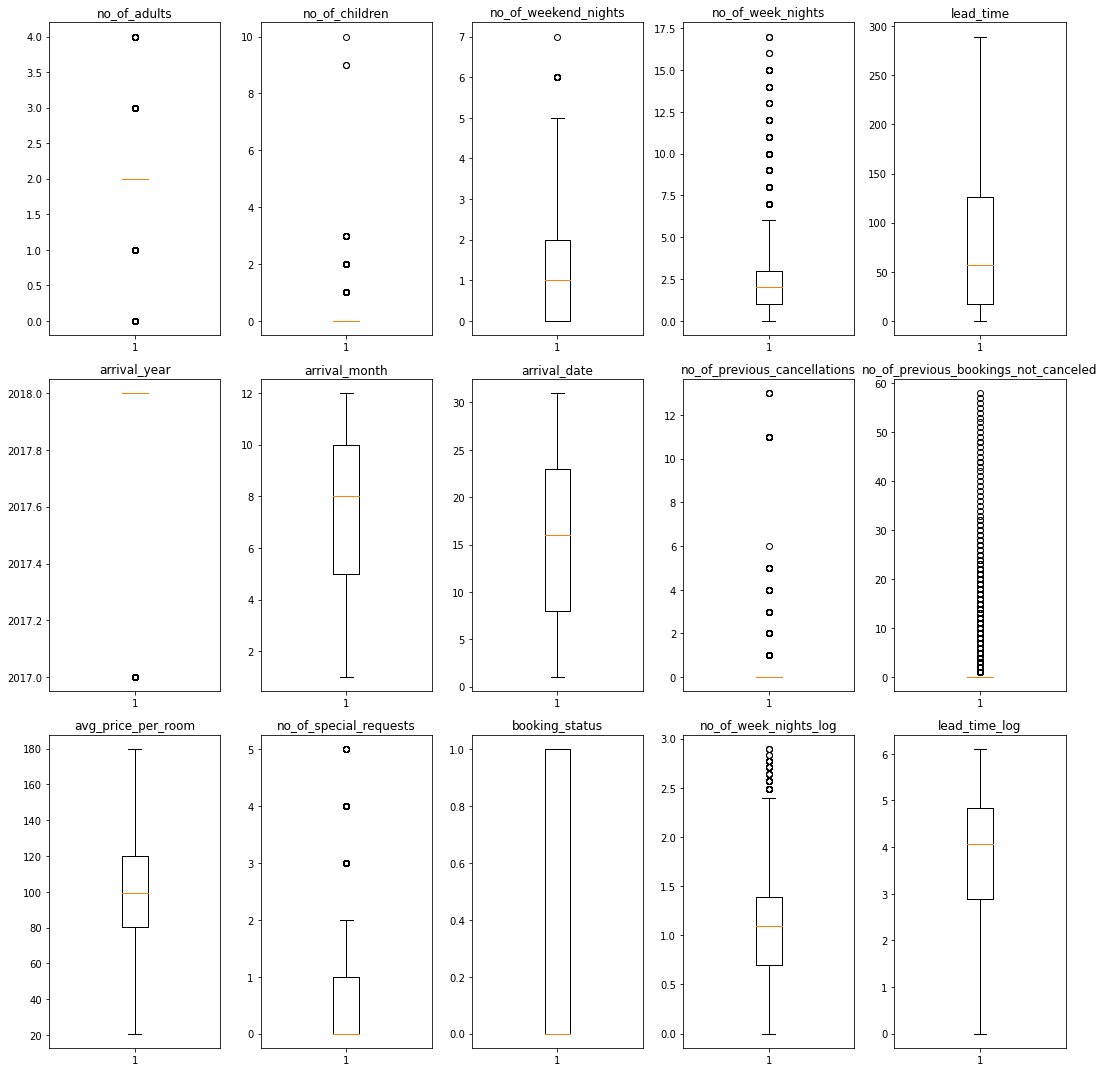

In [79]:
# outlier detection using boxplot and clean outliers on lead_time and avg_price_per_room
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 5, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  object 
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  float64
 9   arrival_year                          36275 non-null  object 
 10  arrival_month                         36275 non-null  object 
 11  arrival_date   

In [23]:
# Transformation to category
df['Booking_ID'] = df['Booking_ID'].astype('category')
df['type_of_meal_plan'] = df['type_of_meal_plan'].astype('category')
df['required_car_parking_space'] = df['required_car_parking_space'].astype('category')
df['room_type_reserved'] = df['room_type_reserved'].astype('category')
df['arrival_year'] = df['arrival_year'].astype('category')
df['arrival_month'] = df['arrival_month'].astype('category')
df['market_segment_type'] = df['market_segment_type'].astype('category')
df['repeated_guest'] = df['repeated_guest'].astype('category')
df['booking_status'] = df['booking_status'].astype('int64')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Booking_ID                            36275 non-null  category
 1   no_of_adults                          36275 non-null  int64   
 2   no_of_children                        36275 non-null  int64   
 3   no_of_weekend_nights                  36275 non-null  int64   
 4   no_of_week_nights                     36275 non-null  int64   
 5   type_of_meal_plan                     36275 non-null  category
 6   required_car_parking_space            36275 non-null  category
 7   room_type_reserved                    36275 non-null  category
 8   lead_time                             36275 non-null  float64 
 9   arrival_year                          36275 non-null  category
 10  arrival_month                         36275 non-null  category
 11  ar

In [25]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,no_of_week_nights_log,lead_time_log
0,INN00001,2,0,1,2,Meal Plan 1,No,Room_Type 1,224.0,2017,...,2,Offline,No,0,0,65.00,0,0,1.098612,5.416100
1,INN00002,2,0,2,3,Not Selected,No,Room_Type 1,5.0,2018,...,6,Online,No,0,0,106.68,1,0,1.386294,1.791759
2,INN00003,1,0,2,1,Meal Plan 1,No,Room_Type 1,1.0,2018,...,28,Online,No,0,0,60.00,0,1,0.693147,0.693147
3,INN00004,2,0,0,2,Meal Plan 1,No,Room_Type 1,211.0,2018,...,20,Online,No,0,0,100.00,0,1,1.098612,5.356586
4,INN00005,2,0,1,1,Not Selected,No,Room_Type 1,48.0,2018,...,11,Online,No,0,0,94.50,0,1,0.693147,3.891820


# Section 2
## 2.1 Building a Logistic Regression model

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [26]:
df1=df.copy()

In [27]:
df1.drop(['Booking_ID'],axis=1,inplace=True)

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          36275 non-null  int64   
 1   no_of_children                        36275 non-null  int64   
 2   no_of_weekend_nights                  36275 non-null  int64   
 3   no_of_week_nights                     36275 non-null  int64   
 4   type_of_meal_plan                     36275 non-null  category
 5   required_car_parking_space            36275 non-null  category
 6   room_type_reserved                    36275 non-null  category
 7   lead_time                             36275 non-null  float64 
 8   arrival_year                          36275 non-null  category
 9   arrival_month                         36275 non-null  category
 10  arrival_date                          36275 non-null  int64   
 11  ma

**Getting the dummies variables**

In [44]:
X = df1.drop(["booking_status"], axis=1)
Y = df1["booking_status"]

# adding a contstant to X variable
X = add_constant(X)

# creating dummies
X = pd.get_dummies(X,columns=X.select_dtypes(include=["object", "category"]).columns.tolist(), drop_first=True)


# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)

In [45]:
X_train.head()

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_date,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,...,arrival_month_March,arrival_month_May,arrival_month_November,arrival_month_October,arrival_month_September,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,repeated_guest_Yes
6870,1.0,2,0,2,3,5.0,30,0,0,116.0,...,0,0,0,0,0,0,0,0,1,0
531,1.0,2,1,0,3,86.0,8,0,0,122.0,...,0,0,0,0,0,0,0,0,1,0
3394,1.0,1,0,0,3,105.0,5,0,0,117.3,...,0,1,0,0,0,0,0,0,1,0
23540,1.0,1,0,1,1,85.0,3,0,0,98.0,...,0,0,0,0,0,0,0,0,1,0
15302,1.0,2,0,1,2,289.5,13,0,0,101.0,...,0,1,0,0,0,0,0,1,0,0


### 2.1.1 Logistic Regression Model Performance

In [46]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_metrics(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold #if is more than threshold then print
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [47]:
# fitting the model on training set
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(method='bfgs')

print("Training Performance:")
model_performance_classification_metrics(lg, X_train, y_train)

         Current function value: 0.408770
         Iterations: 35
         Function evaluations: 39
         Gradient evaluations: 39
Training Performance:


,Accuracy,Recall,Precision,F1
0,0.813209,0.665705,0.7384,0.700171


In [48]:
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25352
Method:                           MLE   Df Model:                           39
Date:                Fri, 23 Dec 2022   Pseudo R-squ.:                  0.3537
Time:                        12:31:46   Log-Likelihood:                -10379.
converged:                      False   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -3.2195      0.290    -11.118      0.000      -3.787      -2.652
no_of_adults                             0.0404      

### 2.1.2 Checking Multicollinearity

The next is to check the performance

In [34]:
# defining a function to plot the confusion_matrix of a classification model
def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred) #actual values , predict values
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [35]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

def checking_vif(predictors):    
    vif_series1 = pd.Series(
        [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])],
        index=predictors.columns,
    )
    i=0
    for num in vif_series1: 
        num='{0:.4g}'.format(num)
        vif_series1[i]=num
        i=i+1
    return vif_series1[vif_series1.values<=10], vif_series1[vif_series1.values>10] 

In [36]:
vif_less10,vif_greater10 = checking_vif(X_train)
print('VIF<=10:\n\n',vif_less10,'\n')
print('VIF>10:\n\n',vif_greater10)

VIF<=10:

 no_of_adults                            1.406
no_of_children                          2.037
no_of_weekend_nights                    1.254
lead_time                               3.642
arrival_date                            1.015
no_of_previous_cancellations            1.331
no_of_previous_bookings_not_canceled    1.577
avg_price_per_room                      2.485
no_of_special_requests                  1.254
lead_time_log                           3.756
type_of_meal_plan_Meal Plan 2           1.271
type_of_meal_plan_Meal Plan 3           1.008
type_of_meal_plan_Not Selected          1.304
required_car_parking_space_Yes          1.042
room_type_reserved_Room_Type 2          1.098
room_type_reserved_Room_Type 3          1.004
room_type_reserved_Room_Type 4          1.378
room_type_reserved_Room_Type 5          1.033
room_type_reserved_Room_Type 6          1.972
room_type_reserved_Room_Type 7          1.078
arrival_year_2018                       1.584
arrival_month_August   

In [76]:
np.linalg.det([[3,5],[56,87]])

-19.000000000000014

* **First Let's see dropping: market_segment_type_Online**

In [37]:
X_train1 = X_train.drop("market_segment_type_Online", axis=1)
vif_less10,vif_greater10 = checking_vif(X_train1)
print('VIF<=10:\n\n',vif_less10,'\n')
print('VIF>10:\n\n',vif_greater10)

VIF<=10:

 no_of_adults                            1.394
no_of_children                          2.037
no_of_weekend_nights                    1.253
lead_time                               3.641
arrival_date                            1.015
no_of_previous_cancellations            1.331
no_of_previous_bookings_not_canceled    1.577
avg_price_per_room                      2.479
no_of_special_requests                  1.250
lead_time_log                           3.730
type_of_meal_plan_Meal Plan 2           1.271
type_of_meal_plan_Meal Plan 3           1.008
type_of_meal_plan_Not Selected          1.301
required_car_parking_space_Yes          1.042
room_type_reserved_Room_Type 2          1.098
room_type_reserved_Room_Type 3          1.004
room_type_reserved_Room_Type 4          1.373
room_type_reserved_Room_Type 5          1.033
room_type_reserved_Room_Type 6          1.972
room_type_reserved_Room_Type 7          1.078
arrival_year_2018                       1.579
arrival_month_August   

In [38]:
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(method='bfgs')

print("Training Performance:")
model_performance_classification_metrics(lg1, X_train1, y_train)

         Current function value: 0.409937
         Iterations: 35
         Function evaluations: 39
         Gradient evaluations: 39
Training Performance:


,Accuracy,Recall,Precision,F1
0,0.812303,0.665585,0.736205,0.699116


* There is no significant change in the model performance as compared to initial model.

* **Now Let's drop: no_of_week_nights_log**

In [39]:
X_train2 = X_train1.drop("no_of_week_nights_log", axis=1)
vif_less10,vif_greater10 = checking_vif(X_train2)
print('VIF<=10:\n\n',vif_less10,'\n')
print('VIF>10:\n\n',vif_greater10)

VIF<=10:

 no_of_adults                            1.391
no_of_children                          2.037
no_of_weekend_nights                    1.082
no_of_week_nights                       1.123
lead_time                               3.637
arrival_date                            1.015
no_of_previous_cancellations            1.331
no_of_previous_bookings_not_canceled    1.576
avg_price_per_room                      2.477
no_of_special_requests                  1.249
lead_time_log                           3.678
type_of_meal_plan_Meal Plan 2           1.270
type_of_meal_plan_Meal Plan 3           1.008
type_of_meal_plan_Not Selected          1.297
required_car_parking_space_Yes          1.042
room_type_reserved_Room_Type 2          1.097
room_type_reserved_Room_Type 3          1.004
room_type_reserved_Room_Type 4          1.373
room_type_reserved_Room_Type 5          1.033
room_type_reserved_Room_Type 6          1.972
room_type_reserved_Room_Type 7          1.078
arrival_year_2018      

In [40]:
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit(method='bfgs')

print("Training Performance:")
model_performance_classification_metrics(lg2, X_train2, y_train)

         Current function value: 0.411597
         Iterations: 35
         Function evaluations: 39
         Gradient evaluations: 39
Training Performance:


,Accuracy,Recall,Precision,F1
0,0.810413,0.661017,0.733885,0.695548


### 2.1.3. Dropping high p-values

In [41]:
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25354
Method:                           MLE   Df Model:                           37
Date:                Thu, 22 Dec 2022   Pseudo R-squ.:                  0.3492
Time:                        12:55:37   Log-Likelihood:                -10451.
converged:                      False   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -3.0430      0.148    -20.597      0.000      -3.333      -2.753
no_of_adults                            -0.0504      

In [43]:
# running a loop to drop variables with high p-value
# initial list of columns
cols = X_train2.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train2[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False, method='bfgs')

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols

In [83]:
print(selected_features)

['const', 'no_of_weekend_nights', 'lead_time', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'lead_time_log', 'type_of_meal_plan_Meal Plan 2', 'required_car_parking_space_Yes', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'arrival_year_2018', 'arrival_month_August', 'arrival_month_December', 'arrival_month_February', 'arrival_month_January', 'arrival_month_July', 'arrival_month_March', 'arrival_month_May', 'arrival_month_November', 'arrival_month_September', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [84]:
X_train3 = X_train2[selected_features]

In [85]:
logit3 = sm.Logit(y_train, X_train3.astype(float))
lg3 = logit3.fit(method='bfgs')

print(lg3.summary())

         Current function value: 0.410677
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25369
Method:                           MLE   Df Model:                           22
Date:                Fri, 29 Apr 2022   Pseudo R-squ.:                  0.3507
Time:                        17:24:05   Log-Likelihood:                -10428.
converged:                      False   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                   

In [86]:
# converting coefficients to odds
odds = np.exp(lg3.params)

# finding the percentage change
perc_change_odds = (np.exp(lg3.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# Dataframe: adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train3.columns).T

,const,no_of_weekend_nights,lead_time,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,lead_time_log,type_of_meal_plan_Meal Plan 2,required_car_parking_space_Yes,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,arrival_year_2018,arrival_month_August,arrival_month_December,arrival_month_February,arrival_month_January,arrival_month_July,arrival_month_March,arrival_month_May,arrival_month_November,arrival_month_September,market_segment_type_Corporate,market_segment_type_Offline
Odds,0.025034,1.167247,1.014513,0.313070,1.017666,0.206338,1.238366,1.523935,0.285914,0.727968,0.767400,1.810553,0.693263,0.154460,1.961233,0.254288,0.743814,1.237902,0.662321,1.391856,0.71404,0.268164,0.131672
Change_odd%,-97.496617,16.724655,1.451294,-68.692967,1.766628,-79.366226,23.836650,52.393488,-71.408558,-27.203221,-23.259952,81.055267,-30.673712,-84.554031,96.123294,-74.571155,-25.618550,23.790200,-33.767864,39.185557,-28.59597,-73.183644,-86.832792


In [104]:
print(np.exp(-3.6875))
print((np.exp(-3.6875) - 1) * 100)

0.025034510149960148
-97.49654898500398


## 2.2 Model performance evaluation

* **Model Performance on the training set, threshold = 0.5**

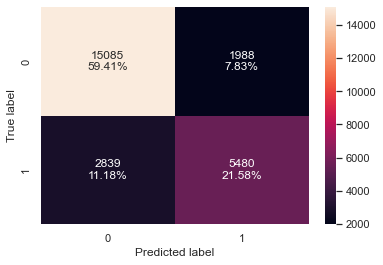

In [87]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_train3, y_train)

In [88]:
log_reg_model_train_perf = model_performance_classification_metrics(
    lg3, X_train3, y_train #it has by default threshold = 0.5
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.809901,0.658733,0.733798,0.694242


**ROC curve on train set**

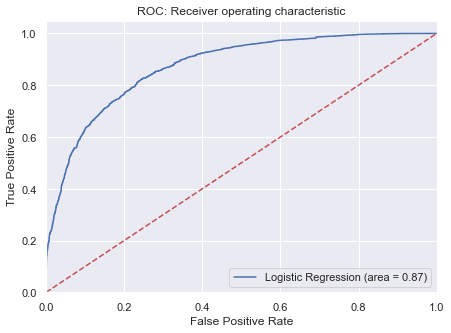

In [89]:
logit_roc_auc_train = roc_auc_score(y_train, lg3.predict(X_train3)) #ROC is blue, #AUC: is Area under curve until red line
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train3))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC: Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [90]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train3)) #y_true, y_score

optimal_idx = np.argmax(tpr - fpr) #Returns the indices of the maximum values along an axis.
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.29367810788289517


In [107]:
np.round(0.29367810788289517,1)

0.3

* **Checking the model performance with this new threshold = 0.3**

In [91]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_metrics(
    lg3, X_train3, y_train, threshold=optimal_threshold_auc_roc #as we increase the threshold the precision decrease
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.778198,0.822094,0.622236,0.708338


**Let's use Precision-Recall curve and see if we can find a better threshold**

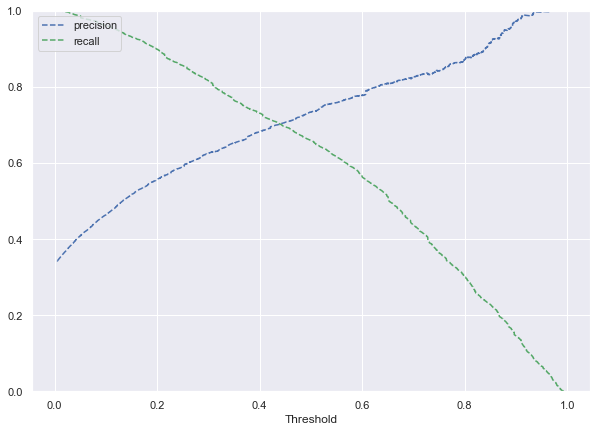

In [92]:
y_scores = lg3.predict(X_train3)
prec, rec, tre = precision_recall_curve(y_train, y_scores)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* **Let's use a threshold of 0.40**

In [93]:
# setting the threshold
optimal_threshold_curve = 0.40

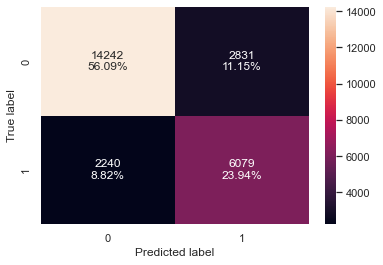

In [94]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_train3, y_train, threshold=optimal_threshold_curve)

In [95]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_metrics(
    lg3, X_train3, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.800291,0.730737,0.682267,0.705671


### Model Performance Summary

In [97]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression (0.3) Threshold",
    "Logistic Regression (0.40) Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression (0.3) Threshold,Logistic Regression (0.40) Threshold
Accuracy,0.809901,0.778198,0.800291
Recall,0.658733,0.822094,0.730737
Precision,0.733798,0.622236,0.682267
F1,0.694242,0.708338,0.705671


* We see that in the model with threshold = 0.3, the Recall is high but the Precision is a bit lower.

### Checking the model on the test set

Let's get only the neccesary columns for the test  

In [98]:
X_test3 = X_test[list(X_train3.columns)]

**Threshold = 0.5**

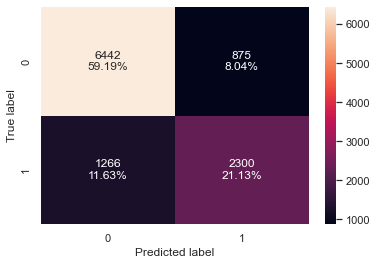

In [99]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test3, y_test)

In [100]:
log_reg_model_test_perf = model_performance_classification_metrics(
    lg3, X_test3, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.803271,0.64498,0.724409,0.682391


* **ROC curve on test set**

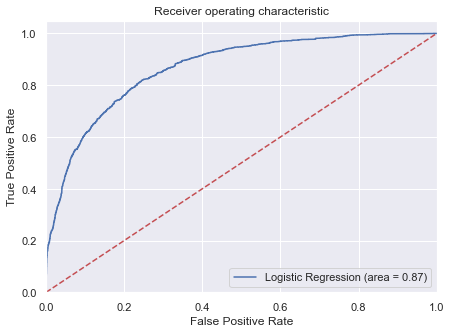

In [101]:
logit_roc_auc_train = roc_auc_score(y_test, lg3.predict(X_test3))
fpr, tpr, thresholds = roc_curve(y_test, lg3.predict(X_test3))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [102]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_test, lg3.predict(X_test3)) #y_true, y_score

optimal_idx = np.argmax(tpr - fpr) #Returns the indices of the maximum values along an axis.
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.29352101075830545


**Threshold = 0.3**

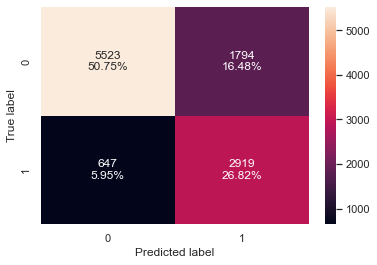

In [103]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test3, y_test, threshold=optimal_threshold_auc_roc)

In [104]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_metrics(
    lg3, X_test3, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.775705,0.818564,0.619351,0.705158


**Threshold = 0.40** 

In [110]:
print("optimal_threshold_curve:",optimal_threshold_curve)

optimal_threshold_curve: 0.4


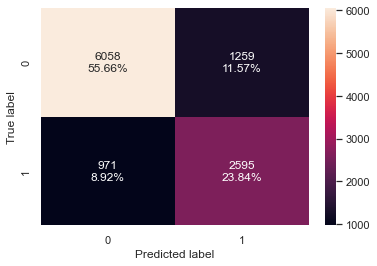

In [109]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test3, y_test, threshold=optimal_threshold_curve)

In [111]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_metrics(
    lg3, X_test3, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.795093,0.727706,0.673326,0.699461


## 2.3 Final Model Summary

In [216]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.3 Threshold",
    "Logistic Regression-0.40 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.3 Threshold,Logistic Regression-0.40 Threshold
Accuracy,0.809901,0.778198,0.800291
Recall,0.658733,0.822094,0.730737
Precision,0.733798,0.622236,0.682267
F1,0.694242,0.708338,0.705671


In [217]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.3 Threshold",
    "Logistic Regression-0.40 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.3 Threshold,Logistic Regression-0.40 Threshold
Accuracy,0.803271,0.775705,0.795093
Recall,0.644980,0.818564,0.727706
Precision,0.724409,0.619351,0.673326
F1,0.682391,0.705158,0.699461


- The performance in both sets (training and testing) are almost the same with any threshold, but in the model with threshold = 0.3 that was obtained in ROC-AUC, Recall is a little better and always we say that, Recall is more important than Precision.